# **Soyabean prices**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

In [ ]:
from google.colab import files

In [ ]:
uploaded = files.upload()

Saving Soyabean_Prices_Aggregated.xlsx to Soyabean_Prices_Aggregated.xlsx


In [ ]:
# Load the data
data = pd.read_excel('Soyabean_Prices_Aggregated.xlsx')
prices = data['Modal Price_Soyabean'].values.reshape(-1, 1)

In [ ]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
prices_scaled = scaler.fit_transform(prices)

In [ ]:
# Split the data into training and testing sets
train_size = int(len(prices_scaled) * 0.8)
test_size = len(prices_scaled) - train_size
train_prices = prices_scaled[0:train_size,:]
test_prices = prices_scaled[train_size:len(prices_scaled),:]

In [ ]:
# Create the input and output sequences
def create_sequences(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [ ]:
look_back = 5
trainX, trainY = create_sequences(train_prices, look_back)
testX, testY = create_sequences(test_prices, look_back)


In [ ]:
# Reshape the input sequences
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

In [ ]:
# Define the RNN model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(look_back, 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# Train the model
model.fit(trainX, trainY, epochs=100, batch_size=32)


Epoch 1/100
4/4 [==============================] - 6s 15ms/step - loss: 0.0411
Epoch 2/100
4/4 [==============================] - 0s 16ms/step - loss: 0.0250
Epoch 3/100
4/4 [==============================] - 0s 13ms/step - loss: 0.0125
Epoch 4/100
4/4 [==============================] - 0s 12ms/step - loss: 0.0079
Epoch 5/100
4/4 [==============================] - 0s 12ms/step - loss: 0.0105
Epoch 6/100
4/4 [==============================] - 0s 13ms/step - loss: 0.0074
Epoch 7/100
4/4 [==============================] - 0s 15ms/step - loss: 0.0067
Epoch 8/100
4/4 [==============================] - 0s 13ms/step - loss: 0.0071
Epoch 9/100
4/4 [==============================] - 0s 13ms/step - loss: 0.0063
Epoch 10/100
4/4 [==============================] - 0s 12ms/step - loss: 0.0059
Epoch 11/100
4/4 [==============================] - 0s 16ms/step - loss: 0.0054
Epoch 12/100
4/4 [==============================] - 0s 13ms/step - loss: 0.0052
Epoch 13/100
4/4 [==============================]

In [ ]:
# Make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

1/1 [==============================] - 1s 1s/step


In [ ]:
# Invert the predictions to their original scale
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [ ]:
# Calculate the root mean squared error (RMSE)
trainScore = np.sqrt(np.mean(np.power(trainY - trainPredict, 2)))
testScore = np.sqrt(np.mean(np.power(testY - testPredict, 2)))
print('Train RMSE: {:.2f}'.format(trainScore))
print('Test RMSE: {:.2f}'.format(testScore))

Train RMSE: 837.78
Test RMSE: 1808.11


In [ ]:
train_rmse = 837.78
test_rmse = 1808.11

overall_rmse = np.sqrt((train_rmse**2 + test_rmse**2)/2)

print('Overall RMSE:', overall_rmse)

Overall RMSE: 1409.10203684829


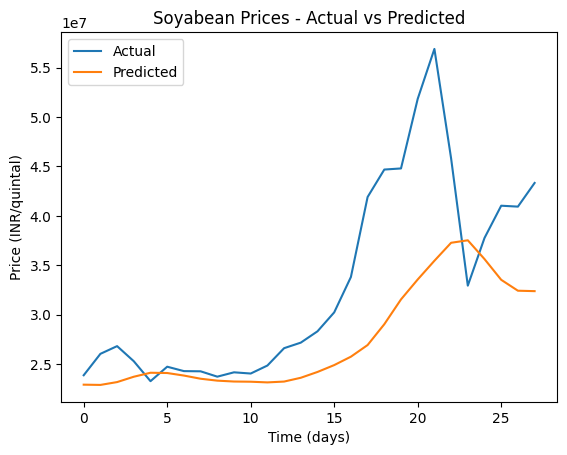

In [19]:
# Plot the actual vs predicted wheat prices for the testing data
plt.plot(scaler.inverse_transform(testY.reshape(-1, 1)), label='Actual')
plt.plot(scaler.inverse_transform(testPredict), label='Predicted')
plt.title('Soyabean Prices - Actual vs Predicted')
plt.xlabel('Time (days)')
plt.ylabel('Price (INR/quintal)')
plt.legend()
plt.show()